In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("C:/Users/shaik/Downloads/shipment_dataset_10000.xlsx")

print(df.head())
print(df.info())


   order_id  supplier_id  supplier_rating  supplier_lead_time order_date  \
0         1         5322              3.4                  10 2024-05-15   
1         2         3932              4.3                  10 2024-11-12   
2         3         8966              3.2                   5 2024-08-28   
3         4         9832              3.9                   7 2024-08-12   
4         5         2126              3.2                   8 2024-07-07   

  promised_delivery_date actual_delivery_date shipment_mode  \
0             2024-05-25           2024-05-29           Sea   
1             2024-11-22           2024-11-27           Sea   
2             2024-09-02           2024-09-02           Sea   
3             2024-08-19           2024-08-19           Air   
4             2024-07-15           2024-07-18           Sea   

   shipping_distance_km  order_quantity  unit_price  total_order_value  \
0                    51              48     2153.91          103387.68   
1               

In [3]:
cat_cols = ['shipment_mode','weather_condition','region','holiday_period',
            'carrier_name','delayed_reason_code']

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)



In [4]:
# Convert to datetime
df['order_date'] = pd.to_datetime(df['order_date'])
df['promised_delivery_date'] = pd.to_datetime(df['promised_delivery_date'])
df['actual_delivery_date'] = pd.to_datetime(df['actual_delivery_date'])

# Delivery duration features
df['promised_duration_days'] = (df['promised_delivery_date'] - df['order_date']).dt.days
df['actual_duration_days'] = (df['actual_delivery_date'] - df['order_date']).dt.days

# Delay in days
df['delay_days'] = df['actual_duration_days'] - df['promised_duration_days']


In [5]:
scale_cols = ['shipping_distance_km','order_quantity','unit_price','total_order_value',
              'supplier_rating','supplier_lead_time','previous_on_time_rate',
              'promised_duration_days','actual_duration_days','delay_days']

scaler = MinMaxScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])


In [6]:
X = df.drop('on_time_delivery', axis=1)
y = df['on_time_delivery']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (8000, 32)
Test shape: (2000, 32)


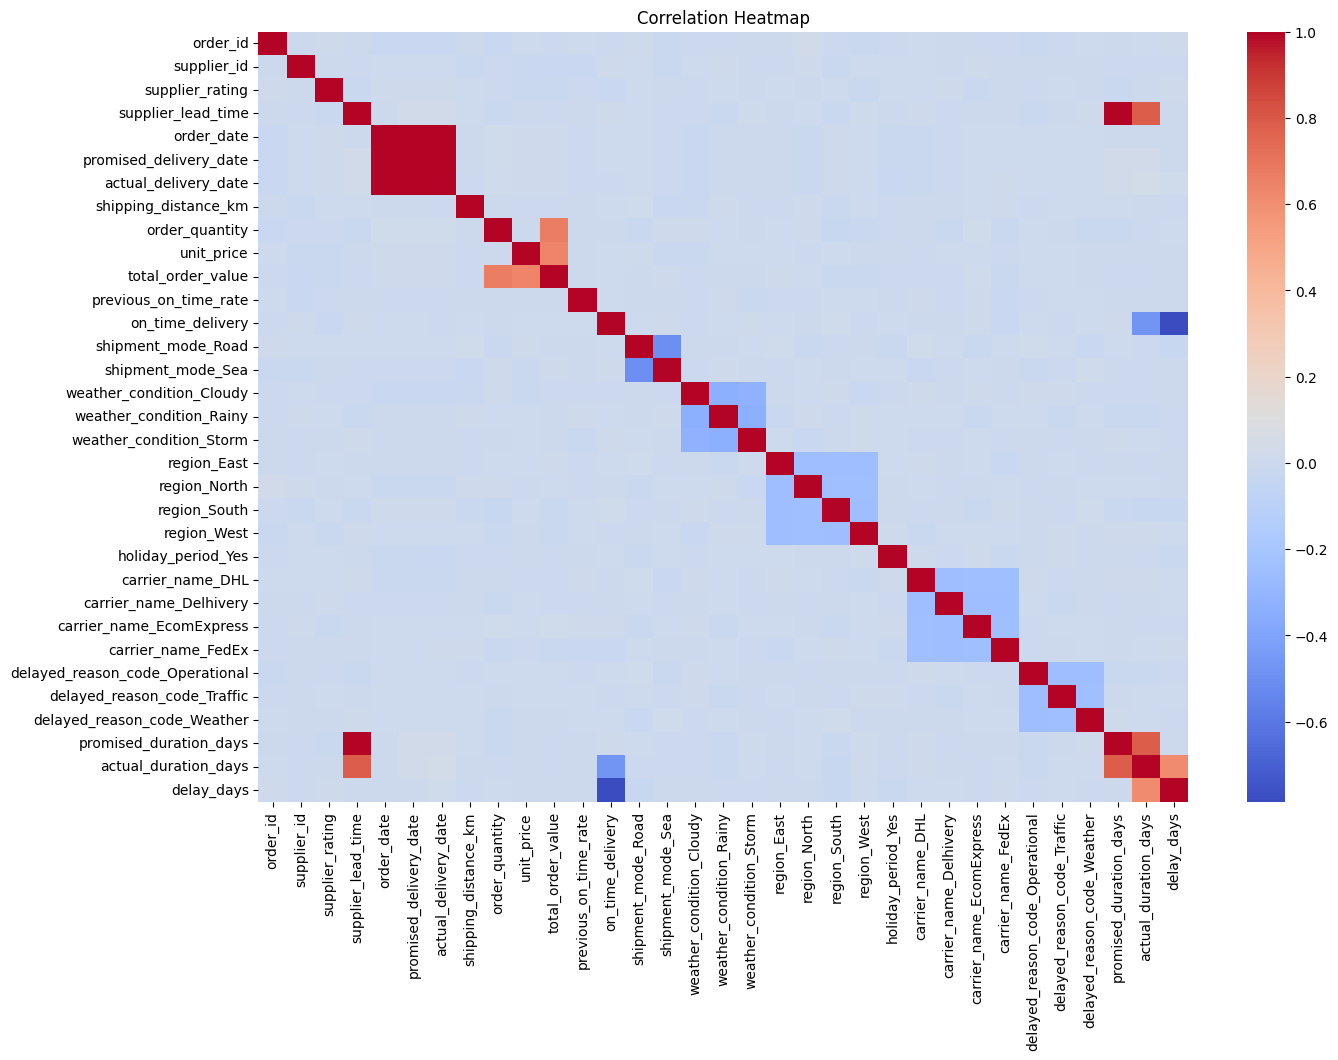

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [8]:
df.to_csv("final_preprocessed_dataset.csv", index=False)
print("Saved final_preprocessed_dataset.csv")


Saved final_preprocessed_dataset.csv


In [9]:
df.to_csv(r"C:/Users/shaik/Desktop/final_preprocessed_dataset.csv", 
                index=False, 
                encoding="utf-8-sig")